# Loading Packages and Data

In [321]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [184]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [185]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Preprocessing

In [186]:
data = pd.concat([train_data, test_data], ignore_index=True)

In [187]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [188]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


In [189]:
data.isnull().sum().sort_values(ascending=False)

Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# Handling missing values

Outlet_Size consists of categorical values so use mode to fill the values

In [190]:
from scipy.stats import mode
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))

In [191]:
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [192]:
missing_values = data['Outlet_Size'].isnull()

In [193]:
missing_values

0        False
1        False
2        False
3         True
4        False
         ...  
14199    False
14200    False
14201     True
14202     True
14203     True
Name: Outlet_Size, Length: 14204, dtype: bool

In [194]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

Visualizing Item_Weight column and Item_Outlet_Sales column to know their distribution since both are numerical columns

Text(0.5, 1.0, 'Item Weight Distribution')

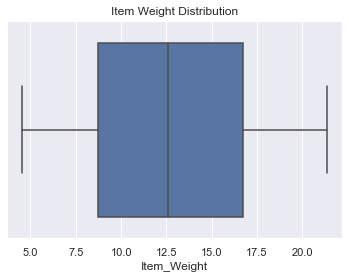

In [195]:
sns.boxplot(x=data['Item_Weight'])
plt.title('Item Weight Distribution')

Since no outliers we can use mean to fill the values

In [196]:
data['Item_Weight'].mean()

12.792854228644991

In [197]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(),inplace=True)

In [198]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Text(0.5, 1.0, 'Item Outlet Sales Distribution')

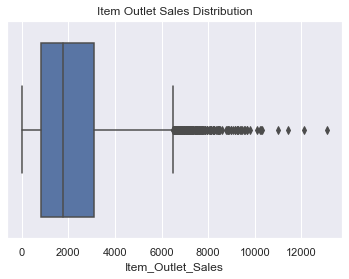

In [199]:
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution')

Removing Outliers

In [200]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

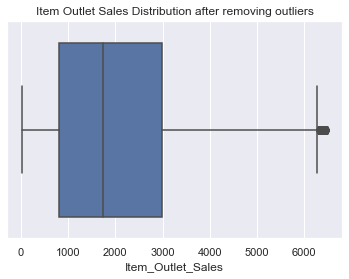

In [201]:
# Item_Outlet_Sales after removing Outliers
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')

In [202]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Data Analysis

In [203]:
# statistical measures about the data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8337.000000,8337.000000,8337.000000,8337.000000,8337.000000
mean,12.846069,0.066358,139.161087,1997.968094,2059.362844
std,4.250474,0.051838,61.553351,8.309941,1506.099754
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027028,93.046200,1987.000000,810.944400
50%,12.792854,0.053939,141.215400,1999.000000,1747.059200
75%,16.100000,0.095299,183.695000,2004.000000,2998.097400
max,21.350000,0.328391,266.888400,2009.000000,6478.234000


# Univariate Analysis

Numerical Features

In [204]:
sns.set()

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


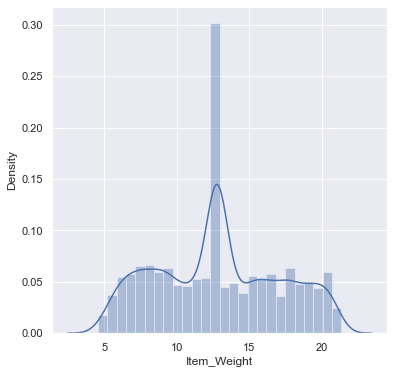

In [205]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Weight"])
plt.show()

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


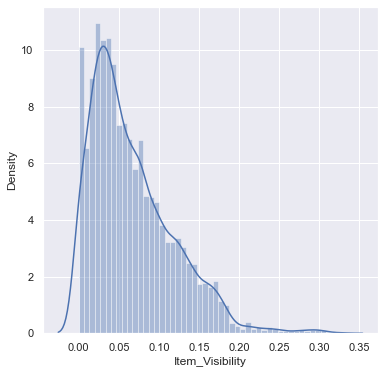

In [206]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Visibility"])
plt.show()

<AxesSubplot:xlabel='Item_Visibility'>

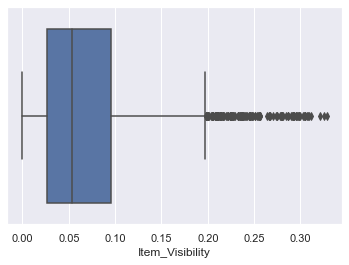

In [207]:
sns.boxplot(x=data['Item_Visibility'])

In [208]:
#Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Visibility")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Visibility'] > lower) & (data['Item_Visibility'] < upper)]

Upper whisker:  0.197704638
Lower Whisker:  -0.075377466


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

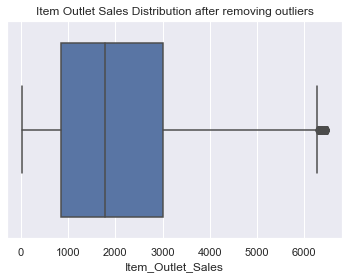

In [209]:
# Item_Visibility after removing Outliers
sns.boxplot(x=data['Item_Outlet_Sales'])
plt.title('Item Outlet Sales Distribution after removing outliers')

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


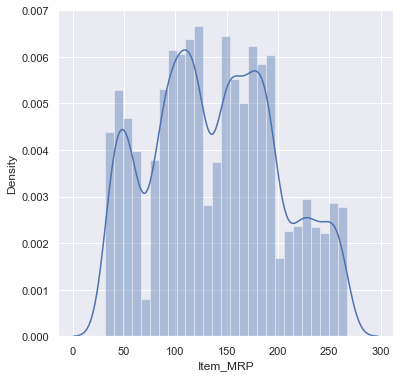

In [210]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_MRP"])
plt.show()

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


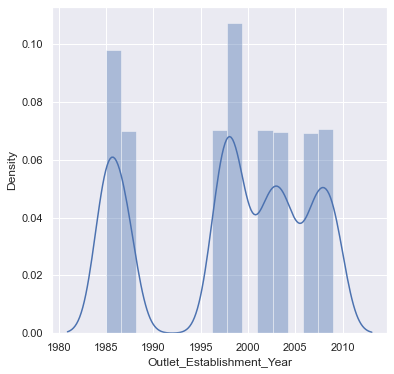

In [211]:
plt.figure(figsize=(6,6))
sns.distplot(data["Outlet_Establishment_Year"])
plt.show()

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


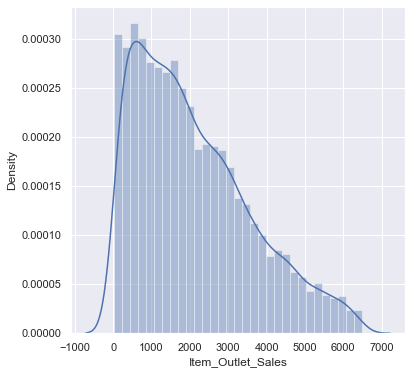

In [212]:
plt.figure(figsize=(6,6))
sns.distplot(data["Item_Outlet_Sales"])
plt.show()

Categorical Features

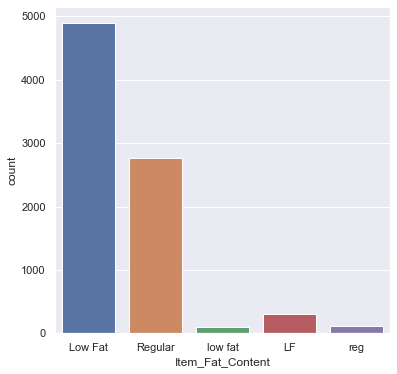

In [213]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data=data)
plt.show()

In [214]:
data["Item_Fat_Content"].value_counts()

Low Fat    4900
Regular    2770
LF          304
reg         115
low fat     107
Name: Item_Fat_Content, dtype: int64

In [215]:
data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace=True)
data["Item_Fat_Content"].value_counts()

Low Fat    5311
Regular    2885
Name: Item_Fat_Content, dtype: int64

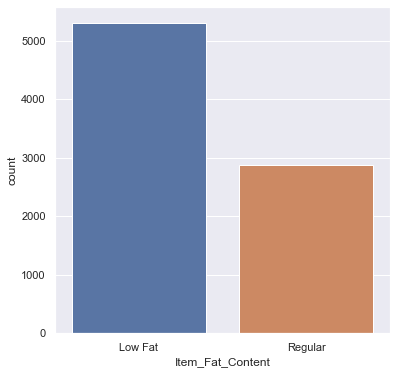

In [216]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x="Item_Fat_Content", data=data)
plt.show()

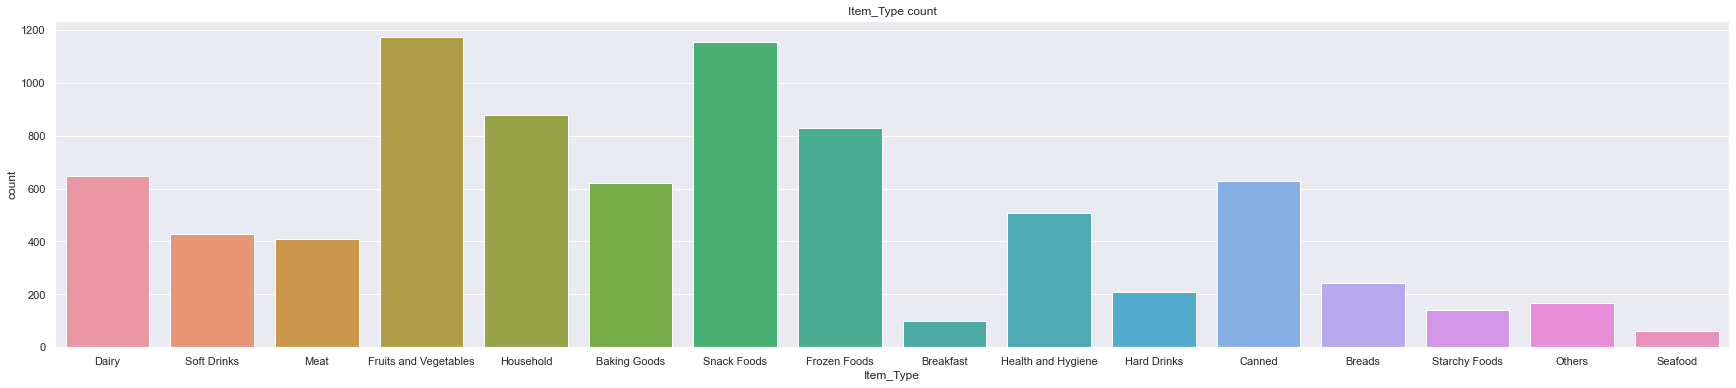

In [217]:
# Item_Type column
plt.figure(figsize=(30,6)) # increasing size of x-axis since the values in that axis were conjusted
sns.countplot(x="Item_Type", data=data)
plt.title("Item_Type count")
plt.show()

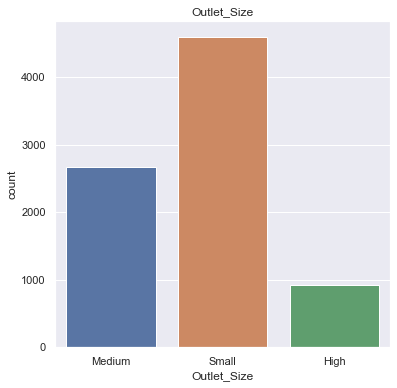

In [218]:
# Outlet_Size column
plt.figure(figsize=(6,6)) 
sns.countplot(x="Outlet_Size", data=data)
plt.title("Outlet_Size")
plt.show()

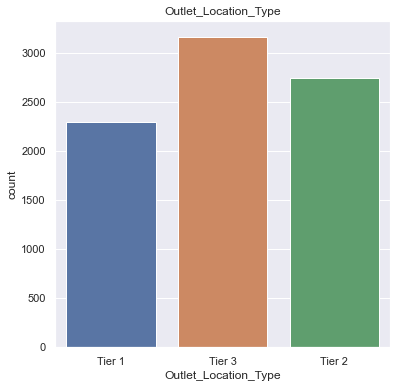

In [219]:
# Outlet_Location_Type column
plt.figure(figsize=(6,6)) 
sns.countplot(x="Outlet_Location_Type", data=data)
plt.title("Outlet_Location_Type")
plt.show()

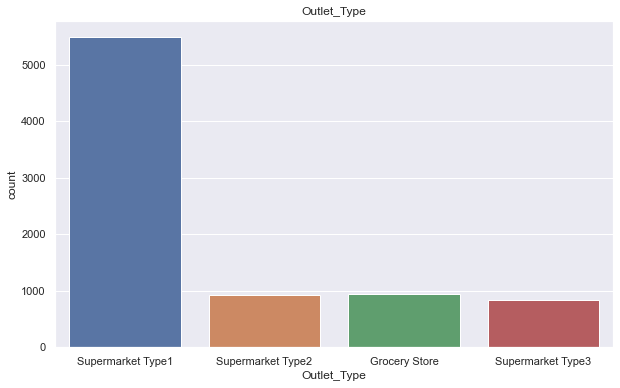

In [220]:
# Outlet_Type column
plt.figure(figsize=(10,6)) 
sns.countplot(x="Outlet_Type", data=data)
plt.title("Outlet_Type")
plt.show()

# Bivariate Analysis

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sales based on Item Type')

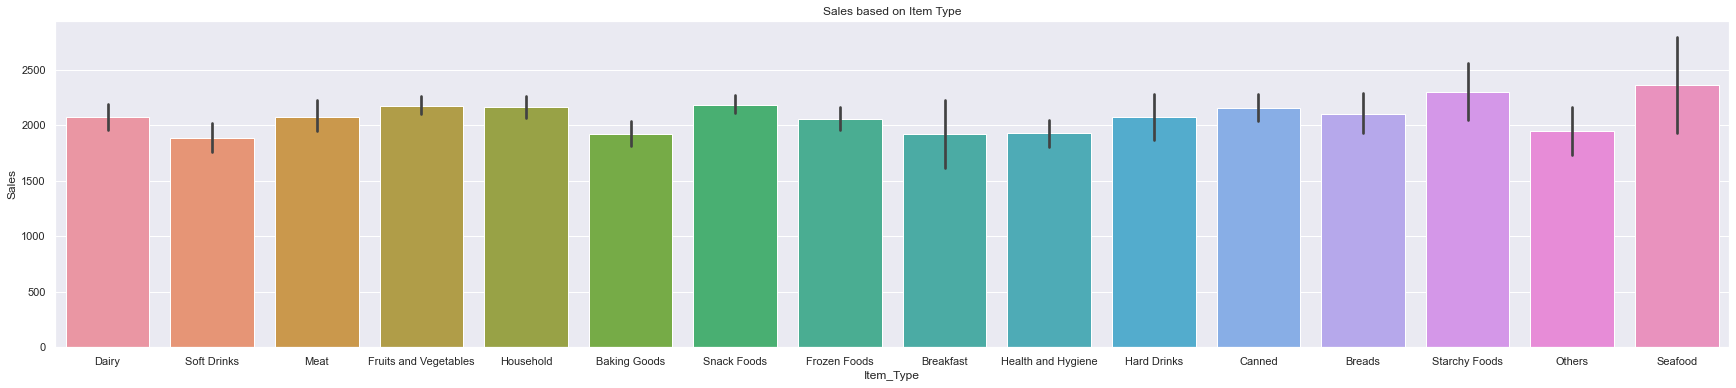

In [225]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(30,6))
sns.barplot(data['Item_Type'],data['Item_Outlet_Sales'])
plt.ylabel('Sales')
plt.title('Sales based on Item Type')

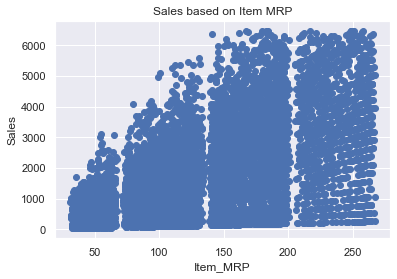

In [226]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Sales')
plt.show()

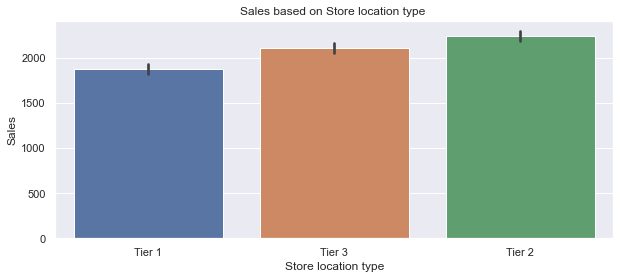

In [227]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.show()

# Label Encoding

In [228]:
encoder = LabelEncoder()

In [229]:
data["Item_Identifier"] = encoder.fit_transform(data['Item_Identifier'])
data["Item_Fat_Content"] = encoder.fit_transform(data['Item_Fat_Content'])
data["Item_Type"] = encoder.fit_transform(data['Item_Type'])
data["Outlet_Identifier"] = encoder.fit_transform(data['Outlet_Identifier'])
data["Outlet_Size"] = encoder.fit_transform(data['Outlet_Size'])
data["Outlet_Location_Type"] = encoder.fit_transform(data['Outlet_Location_Type'])
data["Outlet_Type"] = encoder.fit_transform(data['Outlet_Type'])

In [230]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and Target

In [231]:
X = data.drop(columns="Item_Outlet_Sales" , axis=1) 
Y = data["Item_Outlet_Sales"]

In [232]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [233]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8196, dtype: float64


In [234]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

In [235]:
print(X.shape, X_train.shape, X_test.shape)

(8196, 11) (6556, 11) (1640, 11)


In [329]:
#reg = LinearRegression().fit(X_train,Y_train)

In [332]:
#reg.score(X_test,Y_test) # unseen data

In [333]:
#reg.score(X_train,Y_train)

# Standardization

In [236]:
X.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000,8196.000000
mean,780.171425,12.854667,0.352001,0.063270,7.229624,139.106916,4.762445,1998.086506,1.449732,1.106271,1.200952
std,450.124036,4.267053,0.477623,0.046347,4.206156,61.528746,2.844956,8.287951,0.686512,0.808922,0.770413
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,394.750000,9.300000,0.000000,0.026818,4.000000,93.027800,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,783.500000,12.792854,0.000000,0.052745,6.000000,141.131200,5.000000,1999.000000,2.000000,1.000000,1.000000
75%,1168.000000,16.100000,1.000000,0.092839,10.000000,183.663400,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,1.000000,0.196660,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [239]:
sc= StandardScaler()

In [240]:
X_train_std= sc.fit_transform(X_train)  # learning how the data is in X train and then transforming

In [241]:
X_test_std= sc.transform(X_test)

In [242]:
X_train_std

array([[-0.85129449,  0.08027516,  1.37315818, ..., -0.65472836,
        -1.3605216 , -0.25990872],
       [ 1.2541182 ,  1.3073121 , -0.72824822, ...,  0.80180341,
        -1.3605216 , -0.25990872],
       [ 1.16074193, -0.00400004, -0.72824822, ...,  0.80180341,
        -1.3605216 , -1.55372919],
       ...,
       [ 0.84504119, -0.3090731 ,  1.37315818, ...,  0.80180341,
        -0.12734317, -0.25990872],
       [ 1.41419182,  1.75565252, -0.72824822, ...,  0.80180341,
        -1.3605216 , -0.25990872],
       [ 1.16296517,  0.2808485 , -0.72824822, ...,  0.80180341,
         1.10583527, -1.55372919]])

# ML Model Training

# Linear Regression

In [264]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [265]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [266]:
pred_lr=lr.predict(X_test_std)

In [364]:
r2_lr = r2_score(Y_test,pred_lr)
r2_lr

0.4885487890561965

In [327]:
lr.score(X_test_std,Y_test)

0.4885487890561965

In [328]:
lr.score(X_train_std,Y_train)

0.4803812334273394

In [373]:
print("R Squared Value : ",(r2_lr))
print("MAE Value : ",mean_absolute_error(Y_test,pred_lr))
print("MSE Value : ",np.sqrt(mean_squared_error(Y_test,pred_lr)))

R Squared Value :  0.4885487890561965
MAE Value :  825.7733198911694
MSE Value :  1071.4530092874816


# Random Forest Regressor

In [254]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [270]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor()

In [271]:
pred_rf= rf.predict(X_test_std)

In [314]:
r2_rf = r2_score(Y_test,pred_rf)

In [319]:
print("R Squared Value : ", r2_rf)
print("MAE Value : ",mean_absolute_error(Y_test,pred_rf))
print("MSE Value : ",np.sqrt(mean_squared_error(Y_test,pred_rf)))

R Squared Value :  0.5414431025786267
MAE Value :  733.5077474670732
MSE Value :  1014.5364117458084


# XGBoost Regressor

In [297]:
from xgboost import XGBRegressor

In [298]:
regressor = XGBRegressor() # loading regressor model to the regressor variable

In [299]:
regressor.fit(X_train_std,Y_train) # training the model ,now the model tries to find pattern btw X and Y

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [300]:
pred_reg = regressor.predict(X_train_std)

In [302]:
r2_reg = metrics.r2_score(Y_train,pred_reg)

In [320]:
print("R Squared Value : ", r2_reg)
print("MAE Value : ",mean_absolute_error(Y_test,pred_lr))
print("MSE Value : ",np.sqrt(mean_squared_error(Y_test,pred_lr)))

R Squared Value :  0.849936404386901
MAE Value :  825.7733198911694
MSE Value :  1071.4530092874816


# Regularized Linear Regression

1. Ridge Regression

In [341]:
ridge = Ridge(alpha=50)  
ridge.fit(X_train_std, Y_train)
y_pred_ridge = ridge.predict(X_test_std)
ridge_mse = mean_squared_error(Y_test, y_pred_ridge)
print("Ridge Regression MSE:", ridge_mse)

Ridge Regression MSE: 1148137.2906816213


2. Lasso Regression

In [374]:
lasso = Lasso(alpha=1.0) 
lasso.fit(X_train_std, Y_train)
y_pred_lasso = lasso.predict(X_test_std)
lasso_mse = mean_squared_error(Y_test, y_pred_lasso)
print("Lasso Regression MSE:", lasso_mse)

Lasso Regression MSE: 1148010.539263317


In [340]:
lasso.score(X_test_std,Y_test)

0.4885492398450624

In [377]:
lasso.score(X_train_std,Y_train)

0.4803739020870438

In [376]:
ridge.score(X_train_std,Y_train)

0.48034417691223363

In [378]:
ridge.score(X_test_std,Y_test)

0.4884927707561253

# Summary

In [390]:
score_lr = round(lr.score(X_test_std,Y_test)*100,2)
score_rf = round(rf.score(X_test_std,Y_test)*100,2)
score_xg = round(regressor.score(X_test_std,Y_test)*100,2)
score_ridge = round(ridge.score(X_test_std,Y_test)*100,2)
score_lasso = round(lasso.score(X_test_std,Y_test)*100,2)

D:\Users\Muruganandham K\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

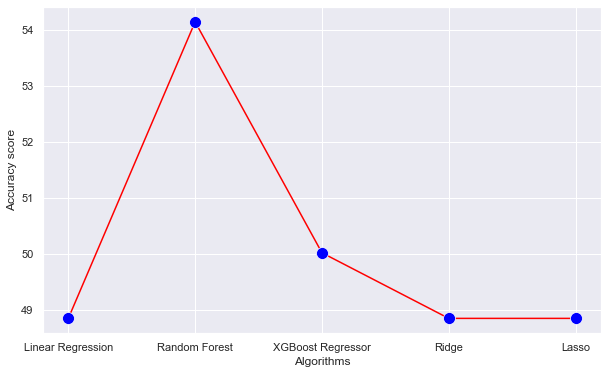

In [395]:
scores = [score_lr,score_rf,score_xg,score_ridge,score_lasso]
algo = ["Linear Regression","Random Forest","XGBoost Regressor","Ridge","Lasso"]

plt.figure(figsize=(10,6))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.lineplot(algo,scores,color='red',linestyle='-',ms=12,marker='o',mfc='blue')